### Attribution:

This notebook was modified from Debsankha Manik's notebook 01-data-wrangling.ipynb, GGNB Data Science course held at the University of Goettingen (2019).

# Data Wrangling


* Often the first step of a Data Science project. 
* Datasets you want to work with may be generated from different softwares, devices, or even by hand.
* Before your *data science tool* can make sense out of them, often some "wrangling" is necessary.

In [1]:
import numpy as np
import pandas as pd

from urllib import request

## CSV i.e. "comma-seperated-value" format

### Using `pd.read_csv`

In [2]:
url = "http://download-data.deutschebahn.com/static/datasets/stationsdaten/DBSuS-Uebersicht_Bahnhoefe-Stand2016-07.csv"

In [3]:
response = request.urlopen(url)
data = response.read()
bf_st = data.decode('utf-8')

In [4]:
import io
buf = io.StringIO(bf_st)

In [5]:
df = pd.read_csv(buf)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 201, saw 2


### Oops, let's try again, Ignoring badly formed lines

In [ ]:
import io
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, error_bad_lines=False)

In [ ]:
df.head()

In [ ]:
df.shape, df.columns

Pandas did not recognize the columns, because we need to...

### Specify the  Delimiter

In [6]:
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, delimiter = ';', error_bad_lines=False)

In [7]:
df.head()

,Bundesland,BM,Bf. Nr.,Station,Bf DS 100 Abk.,Kat. Vst,Straße,PLZ,Ort,Aufgabenträger
0,Nordrhein-Westfalen,Aachen,1,Aachen Hbf,KA,2,Bahnhofplatz 2a,52064,Aachen,Zweckverband Nahverkehr Rheinland GmbH
1,Nordrhein-Westfalen,Aachen,2,Aachen-Rothe Erde,KARE,4,Beverstr. 48,52066,Aachen,Zweckverband Nahverkehr Rheinland GmbH
2,Nordrhein-Westfalen,Aachen,3,Aachen West,KAW,5,Republikplatz 1,52072,Aachen,Zweckverband Nahverkehr Rheinland GmbH
3,Nordrhein-Westfalen,Aachen,184,Arsbeck,KARS,7,Heidestr.1,41844,Wegberg,Zweckverband Nahverkehr Rheinland GmbH
4,Nordrhein-Westfalen,Aachen,235,Hückelhoven-Baal,KBA,4,Bahnstr.11,41836,Hückelhoven-Baal,Zweckverband Nahverkehr Rheinland GmbH


In [8]:
df.columns

Index(['Bundesland', 'BM', 'Bf. Nr.', 'Station', 'Bf DS 100 Abk.', 'Kat. Vst',
       'Straße', 'PLZ', 'Ort', 'Aufgabenträger'],
      dtype='object')

### Reading only certain columns

In [9]:
buf = io.StringIO(bf_st)
df = pd.read_csv(buf, delimiter=';', error_bad_lines=False, 
                 usecols=['Bundesland', 'Station', 'PLZ'])
df.head()

,Bundesland,Station,PLZ
0,Nordrhein-Westfalen,Aachen Hbf,52064
1,Nordrhein-Westfalen,Aachen-Rothe Erde,52066
2,Nordrhein-Westfalen,Aachen West,52072
3,Nordrhein-Westfalen,Arsbeck,41844
4,Nordrhein-Westfalen,Hückelhoven-Baal,41836


### Supplying your own column information

In [10]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
response = request.urlopen(url)
data = response.read()
census_st = data.decode('utf-8')
buf = io.StringIO(census_st)

In [11]:
df = pd.read_csv(buf)

In [12]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
buf = io.StringIO(census_st)
df = pd.read_csv(buf, usecols=[0, 1,3], 
                 names = ['age', 'job', 'education'])
df.head()

,age,job,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors


In [16]:
df.dtypes

age          float64
job           object
education     object
dtype: object

#### Converting columns to desired datatype

In [20]:
buf = io.StringIO(census_st)
df = pd.read_csv(buf, usecols=[0, 1,3], names = ['age', 'job', 'education'], 
                 dtype={'age':float, 'job':str, 'education': str})
df.head()

,age,job,education
0,39.0,State-gov,Bachelors
1,50.0,Self-emp-not-inc,Bachelors
2,38.0,Private,HS-grad
3,53.0,Private,11th
4,28.0,Private,Bachelors


In [18]:
df.dtypes

age          float64
job           object
education     object
dtype: object

#### Changing datatype is also possible afterwards:

In [21]:
df.astype({'age':int, 'job':str, 'education':np.str}).head()

,age,job,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors


### Handling datetimes

In [22]:
df = pd.read_csv('../data/amazonian_birds.csv')
df.head()

,recordist,date,time,location,longitude,latitude,elevation,climate
0,Daniel Lane,2011-02-24,05:55,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
1,Daniel Lane,2011-02-24,06:05,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
2,Eric DeFonso,2011-09-03,18:00,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
3,Eric DeFonso,2011-09-04,06:00,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
4,Eric DeFonso,2011-09-04,06:05,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical


#### Merge `date` and `time` columns

In [23]:
df = pd.read_csv('../data/amazonian_birds.csv', 
                 parse_dates={'datetime':[1,2]}, error_bad_lines=False)
df.head()

,datetime,recordist,location,longitude,latitude,elevation,climate
0,2011-02-24 05:55:00,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
1,2011-02-24 06:05:00,Daniel Lane,"10 km S Pocone on Transpantaneira, Mato Grosso",-56.6480,-16.3620,115,tropical
2,2011-09-03 18:00:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
3,2011-09-04 06:00:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical
4,2011-09-04 06:05:00,Eric DeFonso,"Pantanal Wildlife Center, MT",-56.8764,-16.7581,110,tropical


In [24]:
df.dtypes

datetime     datetime64[ns]
recordist            object
location             object
longitude           float64
latitude            float64
elevation            object
climate              object
dtype: object

In [25]:
df['datetime'] - df['datetime'].shift()

0                       NaT
1           0 days 00:10:00
2         191 days 11:55:00
3           0 days 12:00:00
4           0 days 00:05:00
               ...         
7217   -3412 days +22:14:00
7218      234 days 00:54:00
7219     3023 days 23:52:00
7220    -211 days +08:20:00
7221   -1934 days +16:20:00
Name: datetime, Length: 7222, dtype: timedelta64[ns]

In [26]:
x = df[(df['datetime']>'2013-07-03') & (df['datetime']<'2013-07-15')]

In [27]:
print(len(x))
x.head()

44


,datetime,recordist,location,longitude,latitude,elevation,climate
22,2013-07-13 07:15:00,Josh Engel,Reserva Biologica do Gurupi,-46.8045,-3.8141,190,tropical
456,2013-07-13 10:00:00,Thiago Bicudo,"Silves, Amazonas",-58.3480,-2.9578,30,tropical
561,2013-07-09 07:15:00,Josh Engel,Reserva Biologica do Gurupi,-46.8045,-3.8141,190,tropical
650,2013-07-12 17:30:00,João Vitor Andriola,"Itagiba, São Francisco de Paula, Rio Grande so...",-50.5892,-29.5112,440,subtropical
757,2013-07-13 12:30:00,Rodrigo Dela Rosa,"Senador Guiomard, Acre",-67.7537,-10.1453,180,tropical


In [28]:
import matplotlib.pyplot as plt
import numpy as np

/Users/florencia/venvs/py3venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


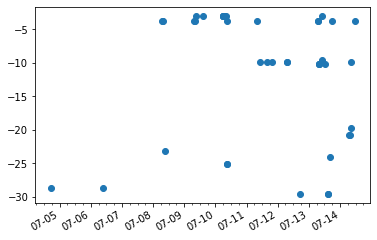

In [29]:
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange

fig, ax = plt.subplots()

ax.plot_date(x['datetime'], x['latitude'], 'o')
# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple

# format ticks
ax.xaxis.set_major_locator(DayLocator())
ax.xaxis.set_minor_locator(HourLocator(np.arange(0, 25, 6))) # minor tick for hours
ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))  # format of the date label 

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate() # rotates x labels
